## Getting the text from the gutemberg project

In [1]:
import requests
from bs4 import BeautifulSoup
import nltk

In [2]:
r = requests.get("https://www.gutenberg.org/files/2701/2701-h/2701-h.htm")
r.encodint = "utf-8"
html = r.text

soup = BeautifulSoup(html, 'html.parser')

text = soup.get_text()

## Processing the text

In [3]:
tokenizer = nltk.tokenize.RegexpTokenizer("\w+")

tokens = tokenizer.tokenize(text)

In [4]:
words = [word.lower() for word in tokens]

In [5]:
from nltk.corpus import stopwords
nltk.download("stopwords")
sw = set(stopwords.words("english"))

words_ns = [word for word in words if word not in sw]

[nltk_data] Downloading package stopwords to /home/mignoe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### verifying Zipf's law in the book


In [6]:
freqdist = nltk.FreqDist(words_ns)

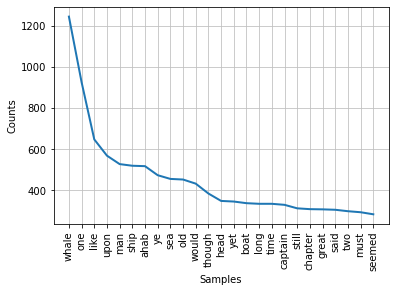

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [7]:
 %matplotlib inline
    
freqdist.plot(25)

#### Stemming versus Lemmatization

In [8]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [9]:
ps = PorterStemmer()

stemmed_words = [ps.stem(word) for word in words_ns]

In [27]:
stemmed_words[32000:32015]

['keep',
 'windward',
 'head',
 'hard',
 'gale',
 'fix',
 'summit',
 'mast',
 'ascend',
 'littl',
 'trap',
 'hatch',
 'bottom',
 'side',
 'side']

In [11]:
from nltk import wordnet

In [12]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /home/mignoe/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/mignoe/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [13]:
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(nltk_pos):
    if nltk_pos.startswith('J'):
        return 'a'
    elif nltk_pos.startswith('V'):
        return 'v'
    elif nltk_pos.startswith('N'):
        return 'n'
    elif nltk_pos.startswith('R'):
        return 'r'
    else:
        return 'n'

lemmatized_words = []
for word, pos in nltk.pos_tag(words_ns):
    pos = get_wordnet_pos(pos)
    lemmatized_words.append(lemmatizer.lemmatize(word, pos))

In [26]:
lemmatized_words[32000:32015]

['keep',
 'windward',
 'head',
 'hard',
 'gale',
 'fix',
 'summit',
 'mast',
 'ascend',
 'little',
 'trap',
 'hatch',
 'bottom',
 'side',
 'side']

##### Comparing how many different words there are in both stemmed_words and lemmatized_words

In [15]:
print(f"Lemmatized different words count: {len(set(lemmatized_words))}")
print(f"Stemmed different words count: {len((set(stemmed_words)))}")

Lemmatized different words count: 13525
Stemmed different words count: 10822


##### There is undoubtly something wrong here... 

### Part-Of-Speech tagging

In [23]:
nltk.pos_tag(words_ns[32000:32015])

[('keep', 'VB'),
 ('windward', 'NN'),
 ('head', 'NN'),
 ('hard', 'JJ'),
 ('gale', 'NN'),
 ('fixed', 'VBN'),
 ('summit', 'NN'),
 ('mast', 'RBS'),
 ('ascend', 'JJ'),
 ('little', 'JJ'),
 ('trap', 'NN'),
 ('hatch', 'NN'),
 ('bottom', 'JJ'),
 ('side', 'NN'),
 ('side', 'NN')]

### N-grams

In [17]:
# starting with bigrams
from nltk import bigrams

In [18]:
string_bigrams = list(bigrams(words_ns))

In [24]:
string_bigrams[32000:32015]

[('keep', 'windward'),
 ('windward', 'head'),
 ('head', 'hard'),
 ('hard', 'gale'),
 ('gale', 'fixed'),
 ('fixed', 'summit'),
 ('summit', 'mast'),
 ('mast', 'ascend'),
 ('ascend', 'little'),
 ('little', 'trap'),
 ('trap', 'hatch'),
 ('hatch', 'bottom'),
 ('bottom', 'side'),
 ('side', 'side'),
 ('side', 'next')]

In [20]:
# now trying trigrams
from nltk import trigrams

In [21]:
string_trigrams = list(trigrams(words_ns))

In [25]:
string_trigrams[32000:32015]

[('keep', 'windward', 'head'),
 ('windward', 'head', 'hard'),
 ('head', 'hard', 'gale'),
 ('hard', 'gale', 'fixed'),
 ('gale', 'fixed', 'summit'),
 ('fixed', 'summit', 'mast'),
 ('summit', 'mast', 'ascend'),
 ('mast', 'ascend', 'little'),
 ('ascend', 'little', 'trap'),
 ('little', 'trap', 'hatch'),
 ('trap', 'hatch', 'bottom'),
 ('hatch', 'bottom', 'side'),
 ('bottom', 'side', 'side'),
 ('side', 'side', 'next'),
 ('side', 'next', 'stern')]